<a href="https://colab.research.google.com/github/SushilKokare/DeepLearningStudy/blob/main/4_Regularization_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb

In [3]:
(xtr,ytr),(xts,yts) = imdb.load_data(num_words=10000)

In [4]:
import numpy as np

In [5]:
def vectorize_data(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [6]:
xtr = vectorize_data(xtr)
xts = vectorize_data(xts)

In [7]:
xtr.shape

(25000, 10000)

In [8]:
ytr = np.array(ytr).astype('float32')
yts = np.array(yts).astype('float32')

In [9]:
val_x = xtr[:10000]
train_x = xtr[10000:]

val_y = ytr[:10000]
train_y = ytr[10000:]

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
def get_model_no_dropout():
  model = Sequential()
  model.add(Dense(16,activation='relu',input_shape=(10000,)))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',
                metrics=['acc'])

  return model

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plots_with_val(history):
  val_acc = history.history['val_acc']
  acc = history.history['acc']

  val_loss = history.history['val_loss']
  loss = history.history['loss']

  epochs = history.epoch

  fig,axs = plt.subplots(1,2, figsize=(10, 3))
  axs[0].plot(epochs,val_acc,'r--',label='Val Acc')
  axs[0].plot(epochs,acc,'b',label='Train Acc')
  axs[0].legend()
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Accuracy')


  axs[1].plot(epochs,val_loss,'r--',label='Val Loss')
  axs[1].plot(epochs,loss,'b',label='Train Loss')
  axs[1].legend()
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Loss')
  axs[1].set_title('Loss')

  plt.show()

In [21]:
model = get_model_no_dropout()

In [22]:
history = model.fit(train_x,train_y,
                    epochs=20,batch_size=512,
                    validation_data=(val_x,val_y))

Epoch 1/20
30/30 [==============================] - 5s 69ms/step - loss: 0.5184 - acc: 0.7786 - val_loss: 0.3864 - val_acc: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3123 - acc: 0.8955 - val_loss: 0.3058 - val_acc: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2329 - acc: 0.9214 - val_loss: 0.2818 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1880 - acc: 0.9385 - val_loss: 0.2746 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1579 - acc: 0.9477 - val_loss: 0.2786 - val_acc: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1370 - acc: 0.9551 - val_loss: 0.2976 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1147 - acc: 0.9655 - val_loss: 0.3049 - val_acc: 0.8807
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1004 - a

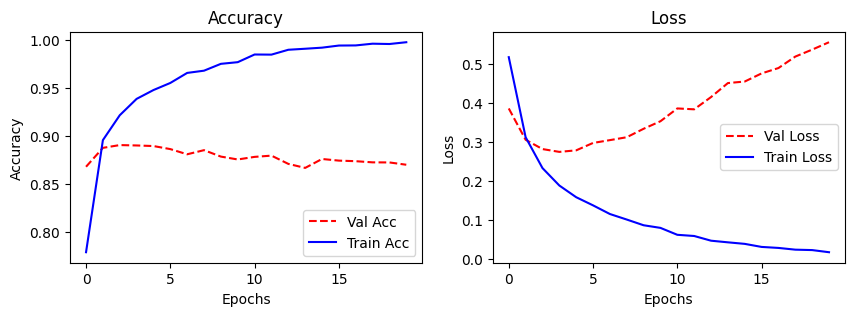

In [44]:
plots_with_val(history)

### Reducing neurons

In [45]:
model2 = Sequential()
model2.add(Dense(4,activation='relu',input_shape=(10000,)))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(train_x,train_y,
                epochs=20,batch_size=512,
                validation_data=(val_x,val_y))

Epoch 1/20
30/30 [==============================] - 4s 88ms/step - loss: 0.6000 - acc: 0.7273 - val_loss: 0.5092 - val_acc: 0.8249
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4371 - acc: 0.8756 - val_loss: 0.4058 - val_acc: 0.8780
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3361 - acc: 0.9115 - val_loss: 0.3437 - val_acc: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2695 - acc: 0.9258 - val_loss: 0.3066 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2263 - acc: 0.9371 - val_loss: 0.2933 - val_acc: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1951 - acc: 0.9454 - val_loss: 0.2804 - val_acc: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1713 - acc: 0.9514 - val_loss: 0.2760 - val_acc: 0.8894
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1520 - a

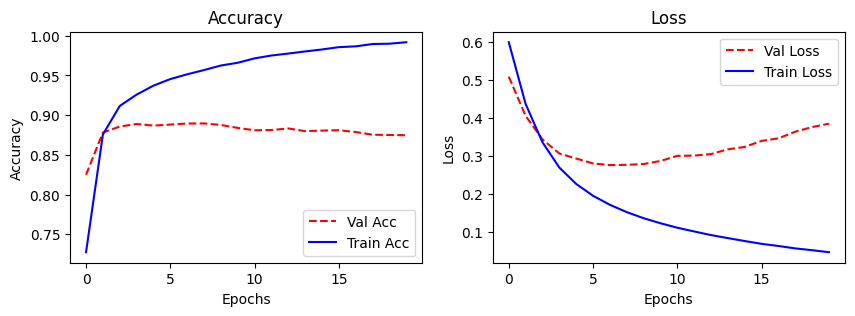

In [46]:
plots_with_val(history2)

### Incresing neurons

In [48]:
model3 = Sequential()
model3.add(Dense(512,activation='relu',input_shape=(10000,)))
model3.add(Dense(512,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(train_x,train_y,
                epochs=20,batch_size=512,
                validation_data=(val_x,val_y),verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5538 - acc: 0.7458 - val_loss: 0.5096 - val_acc: 0.7479
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3165 - acc: 0.8664 - val_loss: 0.4167 - val_acc: 0.8186
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2380 - acc: 0.9042 - val_loss: 0.2919 - val_acc: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1697 - acc: 0.9334 - val_loss: 0.3263 - val_acc: 0.8722
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1347 - acc: 0.9498 - val_loss: 0.2966 - val_acc: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0916 - acc: 0.9695 - val_loss: 0.4128 - val_acc: 0.8637
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0818 - acc: 0.9730 - val_loss: 0.3407 - val_acc: 0.8841
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0683 - a

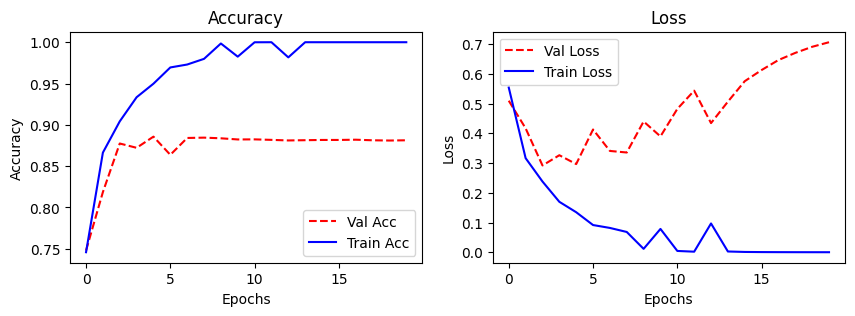

In [49]:
plots_with_val(history3)

### Adding l2 weight regularization to the model

In [13]:
from keras import regularizers

In [52]:
model4 = Sequential()
model4.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),
                 activation='relu',input_shape=(10000,)))
model4.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),
                 activation='relu'))
model4.add(Dense(1,activation='sigmoid'))

model4.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history4 = model4.fit(train_x,train_y,
                epochs=20,batch_size=512,
                validation_data=(val_x,val_y),verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5669 - acc: 0.7783 - val_loss: 0.4435 - val_acc: 0.8714
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3761 - acc: 0.8948 - val_loss: 0.3726 - val_acc: 0.8787
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3040 - acc: 0.9149 - val_loss: 0.3428 - val_acc: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2624 - acc: 0.9304 - val_loss: 0.3290 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2390 - acc: 0.9385 - val_loss: 0.3290 - val_acc: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2153 - acc: 0.9478 - val_loss: 0.3361 - val_acc: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2023 - acc: 0.9540 - val_loss: 0.3391 - val_acc: 0.8846
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1920 - a

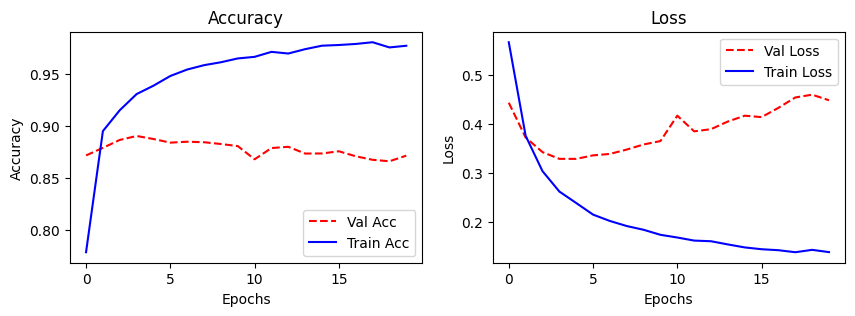

In [53]:
plots_with_val(history4)

### Adding l1 weight regularization to the model

In [55]:
model5 = Sequential()
model5.add(Dense(16,kernel_regularizer=regularizers.l1(0.001),
                 activation='relu',input_shape=(10000,)))
model5.add(Dense(16,kernel_regularizer=regularizers.l1(0.001),
                 activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

model5.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history5 = model5.fit(train_x,train_y,
                epochs=20,batch_size=512,
                validation_data=(val_x,val_y),verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 1.1565 - acc: 0.7313 - val_loss: 0.7244 - val_acc: 0.8194
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6772 - acc: 0.8377 - val_loss: 0.6564 - val_acc: 0.8525
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6216 - acc: 0.8525 - val_loss: 0.6111 - val_acc: 0.8597
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5884 - acc: 0.8613 - val_loss: 0.6021 - val_acc: 0.8487
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5679 - acc: 0.8649 - val_loss: 0.5715 - val_acc: 0.8647
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5543 - acc: 0.8677 - val_loss: 0.5710 - val_acc: 0.8609
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5439 - acc: 0.8697 - val_loss: 0.5489 - val_acc: 0.8672
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5295 - a

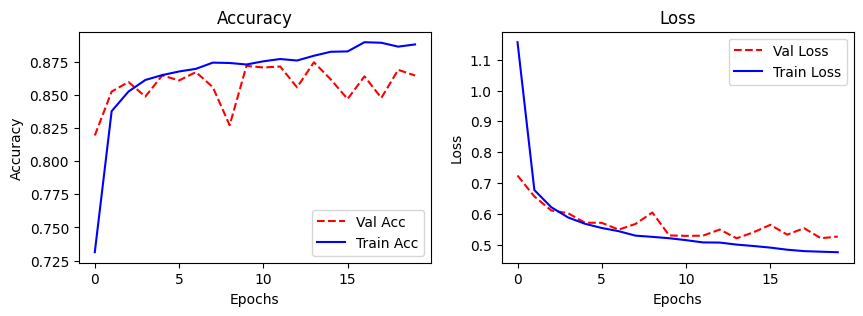

In [56]:
plots_with_val(history5)

### Adding l1 and l2 both weight regularization to the model

In [14]:
model6 = Sequential()
model6.add(Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                 activation='relu',input_shape=(10000,)))
model6.add(Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                 activation='relu'))
model6.add(Dense(1,activation='sigmoid'))

model6.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history6 = model6.fit(train_x,train_y,
                epochs=20,batch_size=512,
                validation_data=(val_x,val_y),verbose=1)

Epoch 1/20
30/30 [==============================] - 7s 84ms/step - loss: 1.1718 - acc: 0.7249 - val_loss: 0.7677 - val_acc: 0.7385
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.7040 - acc: 0.8239 - val_loss: 0.6927 - val_acc: 0.8403
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.6515 - acc: 0.8436 - val_loss: 0.6421 - val_acc: 0.8475
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6153 - acc: 0.8573 - val_loss: 0.6491 - val_acc: 0.8294
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5976 - acc: 0.8538 - val_loss: 0.6007 - val_acc: 0.8554
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5779 - acc: 0.8606 - val_loss: 0.5868 - val_acc: 0.8611
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5675 - acc: 0.8611 - val_loss: 0.5695 - val_acc: 0.8594
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5596 - a

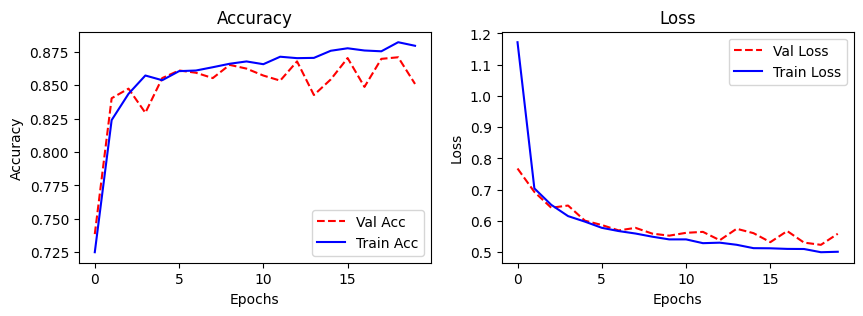

In [15]:
plots_with_val(history6)

### Adding Dropout

In [16]:
from keras.layers import Dropout

In [17]:
model7 = Sequential()
model7.add(Dense(16,activation='relu',input_shape=(10000,)))
model7.add(Dropout(0.5))
model7.add(Dense(16,activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(1,activation='sigmoid'))

model7.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['acc'])

history7 = model7.fit(train_x,train_y,
                epochs=20,batch_size=512,
                validation_data=(val_x,val_y),verbose=1)

Epoch 1/20
30/30 [==============================] - 5s 110ms/step - loss: 0.6372 - acc: 0.6365 - val_loss: 0.5392 - val_acc: 0.8435
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5187 - acc: 0.7631 - val_loss: 0.4238 - val_acc: 0.8678
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4372 - acc: 0.8220 - val_loss: 0.3557 - val_acc: 0.8722
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3789 - acc: 0.8582 - val_loss: 0.3098 - val_acc: 0.8806
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3322 - acc: 0.8846 - val_loss: 0.2958 - val_acc: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2886 - acc: 0.9005 - val_loss: 0.2906 - val_acc: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2540 - acc: 0.9159 - val_loss: 0.2768 - val_acc: 0.8877
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2273 - 

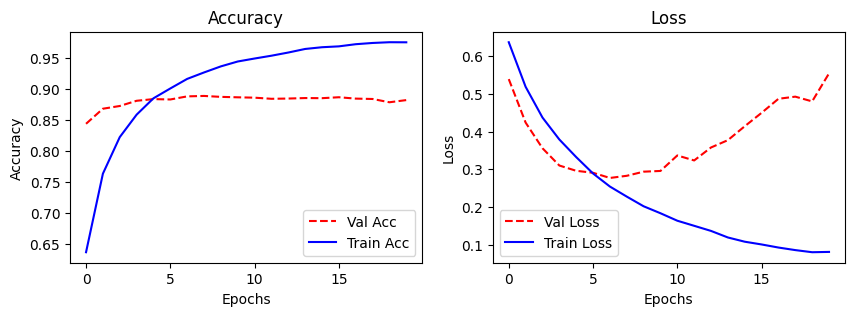

In [18]:
plots_with_val(history7)